In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def topological_sort(graph):
    linear_space = []
    degree = [0 for _ in range(len(graph))]
    for top in graph:
        for i in top:
            degree[i] += 1
    nexta = [i for i in range(len(graph)) if degree[i] == 0] 
    while len(nexta) != 0:
        top = nexta.pop(0)
        linear_space.append(top)
        for i in graph[top]:
            degree[i] -= 1
            if degree[i] == 0:
                nexta.insert(0, i)
    return linear_space

graph = [[2], 
         [3],
         [3, 4],
         [5],
         [5], 
         [6, 10],
         [7],
         [12],
         [9], 
         [10],
         [11],
         [12],
         [13],
         []]

print(topological_sort(graph))

[0, 2, 4, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [3]:
def circle_equation(x0, y0, xx, yy):
    return np.sqrt((xx - x0) ** 2 + (yy - y0) ** 2)

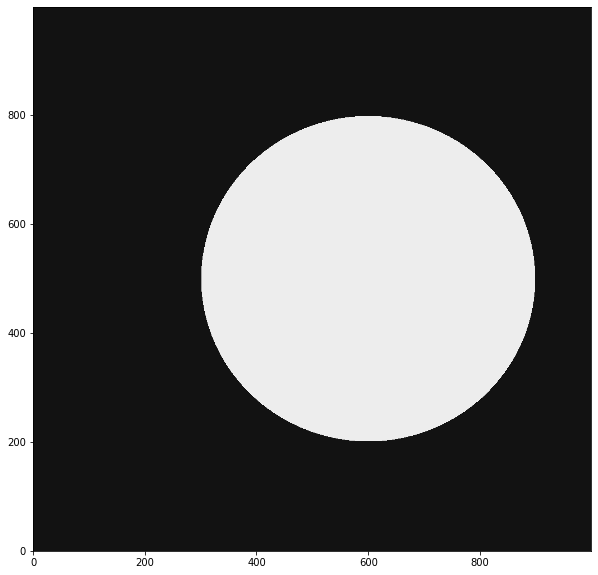

In [4]:
x0, y0 = (600, 500)
R = 300
xx, yy = np.meshgrid(np.arange(1000), np.arange(1000))
zz = np.vectorize(lambda x: x >= R)(circle_equation(x0, y0, xx, yy))
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, zz, cmap='binary')

In [5]:
def find_min_cost(costs, processed):
    lowest = float('inf')
    lowest_node = None
    for node in costs:
        cost = costs[node]
        if (cost < lowest) and (node not in processed):
            lowest = cost
            lowest_node = node
    return lowest_node
    
    
def deikstra(graph, costs, parents):
    processed = []
    node = find_min_cost(costs, processed)
    while node is not None:
        cost = costs[node]
        neighbors = graph[node]
        for n in neighbors.keys():
            new_cost = cost + neighbors[n]
            if costs[n] > new_cost:
                costs[n] = new_cost
                parents[n] = node
        processed.append(node)
        node = find_min_cost(costs, processed)

    
graph = {}
graph['start'] = {}
graph['start']['a'] = 2
graph['start']['b'] = 6
graph['a'] = {}
graph['a']['fin'] = 1
graph['b'] = {}
graph['b']['a'] = 3
graph['b']['fin'] = 5
graph['fin'] = {}

costs = {}
costs['a'] = 6
costs['b'] = 2
costs['fin'] = float('inf')

parents = {}
parents['a'] = 'start'
parents['b'] = 'start'
parents['fin'] = None

deikstra(graph, costs, parents)
print(costs, parents)

{'a': 5, 'b': 2, 'fin': 6} {'a': 'b', 'b': 'start', 'fin': 'a'}


In [13]:
def shortest_path(graph, weights, s):
    linear_space = topological_sort(graph)
    shortest = [0 if s == i else float('inf') for i in linear_space]
    pred = [None for _ in linear_space]
    for i in linear_space:
        for j in graph[i]:
            index = graph[i].index(j)
            if shortest[i] + weights[i][index] < shortest[j]:
                shortest[j] = shortest[i] + weights[i][index]
                pred[j] = i
    return shortest, pred
    
graph = [[2], 
         [3],
         [3, 4],
         [5],
         [5], 
         [6, 10],
         [7],
         [12],
         [9], 
         [10],
         [11],
         [12],
         [13],
         []]

weights = [[2], 
         [3],
         [3, 4],
         [5],
         [5], 
         [6, 10],
         [7],
         [12],
         [9], 
         [10],
         [11],
         [12],
         [13],
         []]

print(shortest_path(graph, weights, 0))

([0, inf, 2, 5, 6, 10, 16, 23, inf, inf, 20, 31, 35, 48], [None, None, 0, 2, 2, 3, 5, 6, None, None, 5, 10, 7, 12])
